In [4]:
import pandas as pd
import numpy as np
from jmarkov.dtmc import dtmc
from jmarkov.ctmc import ctmc

In [5]:
df = pd.read_excel('fabrica_papel.xlsx', sheet_name='Sheet1')
df

,id_rollo,id_lote,tiempo_entre_llegadas,peso,longitud
0,1,1,7.580508,503.556137,98.173125
1,2,1,7.807195,479.862020,107.402817
2,3,1,9.484788,492.965665,103.301277
3,4,1,16.371784,498.011138,98.078701
4,5,1,36.504883,511.179924,100.827708
...,...,...,...,...,...
995,996,10,28.086941,434.101150,93.130072
996,997,10,47.409307,508.062992,108.060990
997,998,10,18.352347,503.701301,96.037015
998,999,10,27.865058,511.799230,100.032015


<Axes: >

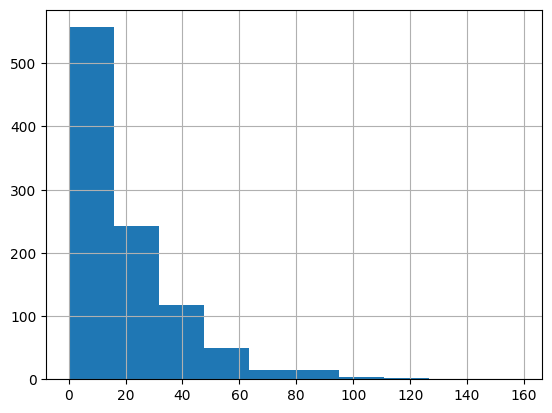

In [6]:
df["tiempo_entre_llegadas"].hist()

In [7]:
media = df["tiempo_entre_llegadas"].mean()
lambda_estimada = 1/media

lambda_estimada

0.051054383107087965

In [10]:
estados = []

for i in range(4):
    for j in range(3):
        for k in range(3):
            estados.append((i,j,k))
            
estados

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2)]

In [12]:
matriz_transicion = np.zeros((len(estados),len(estados)))

In [ ]:
# ...existing code...
matrizQ = np.zeros((len(estados), len(estados)))

for fila_idx, fila in enumerate(estados):      # estado actual
    for col_idx, columna in enumerate(estados): # estado siguiente

        i, j, k = fila      # fila es una tupla (i, j, k)
        l, m, n = columna   # columna es una tupla (l, m, n)

        # Llegadas a la primera zona (prensas presión)
        if i < 3 and l == i + 1 and m == j and n == k:
            matrizQ[fila_idx, col_idx] = lambda_estimada

        # Procesamiento prensa presión (zona 1)
        if i > 0 and j < 2 and l == i - 1 and m == j + 1 and n == k:
            matrizQ[fila_idx, col_idx] = 0.1036605

        # Procesamiento zona recubrimiento (zona 2)
        if j > 0 and k < 2 and l == i and m == j - 1 and n == k + 1:
            matrizQ[fila_idx, col_idx] = 0.125 * min(j, 2)

        # Procesamiento máquina satinadora (zona 3)
        if k > 0 and l == i and m == j and n == k - 1:
            matrizQ[fila_idx, col_idx] = (11 / 12) * 0.2
            
    matrizQ[fila_idx, fila_idx] = -np.sum(matrizQ[fila_idx])
# ...existing code...

cadena = ctmc(matrizQ, estados)

## Literal b

In [38]:
# Tiempo de ocupacion para 7 horas
t=25200 # segundos
ocupacion = cadena.occupation_time(t)
ocupacion

# sacar tiempo de zona llena
t_lleno = ocupacion[estados.index((0,0,0)),estados.index((3,2,2))]
t_lleno

# sacar tiempo total

t_total = t

# proporcion

proporcion = t_lleno/t_total
proporcion

0.0001446863519750936

## Literal c

In [43]:
# Numero promedio de rollos de papel en area de fabricacion, asumimos largo plazo

# verificar irreducidiblidad

cadena.is_irreducible()

# sacar steady state

pi = cadena.steady_state()

# sumatoria

sumatoria = 0

for e in estados:
    i,j,k = e
    
    sumatoria += (i+j+k) * pi[estados.index(e)]
    
sumatoria

1.4915419466760638

## Literal d

In [47]:
# Tiempo de primera pasada

tiempo_pp = cadena.first_passage_time(estados.index((3,2,2)))
resultado = tiempo_pp[estados.index((1,1,1))]
resultado[0]

39953.10367284444